# Plotting calibration data from SIMS

## Import dependencies

In [41]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Import data

In [51]:
calibration_data=pd.read_excel("Calibration_Data_Only_for_plotting_Charlotte_0924.xlsx",sheet_name="Calibration Data",skiprows=113)
Brian_regression_data=pd.read_excel("Calibration_Data_Only_for_plotting_Charlotte_0924.xlsx",sheet_name="Regression Data")
calibration_data.columns

Index(['Date', 'File .asc', 'Standard', 'CO2', 'H2O', 'F', 'P2O5', 'S', 'Cl',
       'SiO2 wt%', 'C/Si', 'OH/Si', 'F/Si', 'P/Si', 'S/Si', 'Cl/Si',
       'C/Si 1sig', 'OH/Si 1 sig', 'F/Si 1 sig', 'P/Si 1 sig', 'S/Si 1 sig',
       'Cl/Si 1 sig', 'C/Si 2sig', 'OH/Si 2 sig', 'F/Si 2 sig', 'P/Si 2 sig',
       'S/Si 2 sig', 'Cl/Si 2 sig'],
      dtype='object')

In [59]:
Brian_regression_data

,Calibration 03/24,CO2,H2O,F,P2O5,S,Cl
0,m,379.482100,0.007693,6.974286,0.022452,11.430250,11.710960
1,m error,60.435200,0.000370,0.175239,0.000622,0.487550,1.079520
2,% error on slope,15.925705,4.811144,2.512644,2.770977,4.265436,9.218032


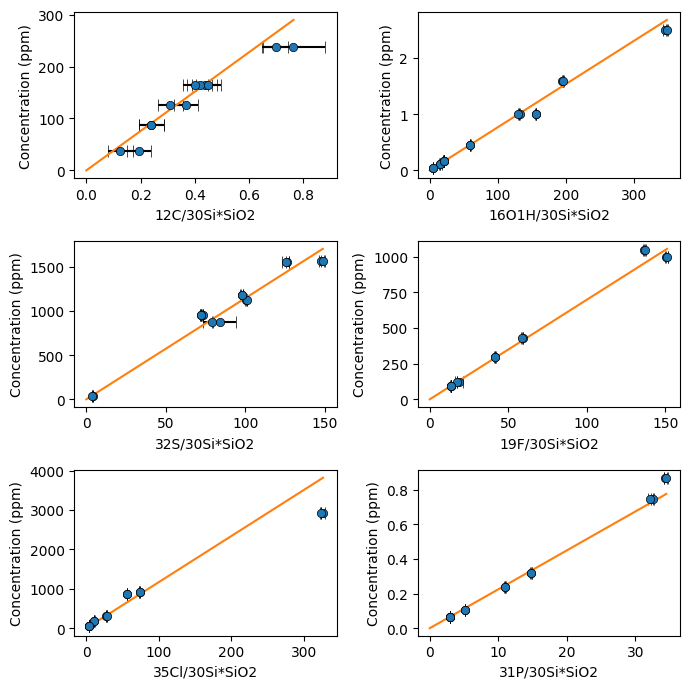

In [60]:
fig, ax = plt.subplots(3, 2, figsize=(7, 7))

fmt='o'
capsize=4
ecolor='k'
mec='k'
mew=0.5

ax[0, 0].errorbar(
    x=calibration_data['C/Si'], 
    y=calibration_data['CO2'], 
    xerr=calibration_data['C/Si 2sig'], 
    fmt=fmt, 
    capsize=capsize,
    ecolor=ecolor,
    mec=mec,
    mew=mew
)
x=np.linspace(0,max(calibration_data['C/Si']),100)
ax[0,0].plot(x,Brian_regression_data['CO2'][0]*x)

ax[0,0].set_xlabel("12C/30Si*SiO2")
ax[0,0].set_ylabel("Concentration (ppm)")

ax[0, 1].errorbar(
    x=calibration_data['OH/Si'], 
    y=calibration_data['H2O'], 
    xerr=calibration_data['OH/Si 2 sig'], 
    fmt=fmt, 
    capsize=capsize  ,
    ecolor=ecolor,
    mec=mec,
    mew=mew
)

x=np.linspace(0,max(calibration_data['OH/Si']),100)
ax[0,1].plot(x,Brian_regression_data['H2O'][0]*x)

ax[0,1].set_xlabel("16O1H/30Si*SiO2")
ax[0,1].set_ylabel("Concentration (ppm)")

ax[1, 0].errorbar(
    x=calibration_data['S/Si'], 
    y=calibration_data['S'], 
    xerr=calibration_data['S/Si 2 sig'], 
    fmt=fmt, 
    capsize=capsize ,
    ecolor=ecolor ,
    mec=mec,
    mew=mew
)

x=np.linspace(0,max(calibration_data['S/Si']),100)
ax[1,0].plot(x,Brian_regression_data['S'][0]*x)

ax[1,0].set_xlabel("32S/30Si*SiO2")
ax[1,0].set_ylabel("Concentration (ppm)")

ax[1, 1].errorbar(
    x=calibration_data['F/Si'], 
    y=calibration_data['F'], 
    xerr=calibration_data['F/Si 2 sig'], 
    fmt=fmt, 
    capsize=capsize,
    ecolor=ecolor   ,
    mec=mec,
    mew=mew
)
x=np.linspace(0,max(calibration_data['F/Si']),100)
ax[1,1].plot(x,Brian_regression_data['F'][0]*x)

ax[1,1].set_xlabel("19F/30Si*SiO2")
ax[1,1].set_ylabel("Concentration (ppm)")

ax[2, 0].errorbar(
    x=calibration_data['Cl/Si'], 
    y=calibration_data['Cl'], 
    xerr=calibration_data['Cl/Si 2 sig'], 
    fmt=fmt, 
    capsize=capsize,
    ecolor=ecolor  ,
    mec=mec,
    mew=mew 
)
x=np.linspace(0,max(calibration_data['Cl/Si']),100)
ax[2,0].plot(x,Brian_regression_data['Cl'][0]*x)

ax[2,0].set_xlabel("35Cl/30Si*SiO2")
ax[2,0].set_ylabel("Concentration (ppm)")

ax[2, 1].errorbar(
    x=calibration_data['P/Si'], 
    y=calibration_data['P2O5'], 
    xerr=calibration_data['P/Si 2 sig'], 
    fmt=fmt, 
    capsize=capsize,
    ecolor=ecolor   ,
    mec=mec,
    mew=mew
)
x=np.linspace(0,max(calibration_data['P/Si']),100)
ax[2,1].plot(x,Brian_regression_data['P2O5'][0]*x)

ax[2,1].set_xlabel("31P/30Si*SiO2")
ax[2,1].set_ylabel("Concentration (ppm)")

fig.tight_layout()
plt.show()

